# 2D with tri-axial anisotropy comparison between `emg3d` and `MARE2DEM`

`MARE2DEM` is an open-source, finite element 2.5D code CSEM and MT code, see https://mare2dem.ucsd.edu. The `MARE2DEM` input- and output-files are located in the data-directory.


#### Requires
- **emg3d >= 0.9.0** (currently only available on pip, not on conda)
- ``discretize``
- ``numpy``, ``scipy``, ``numba``, ``matplotlib``

In [1]:
import emg3d
import discretize
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as sint
from matplotlib.colors import LogNorm, SymLogNorm

In [2]:
# Style adjustments
%matplotlib notebook
#%matplotlib inline
plt.style.use('ggplot')

## `emg3d`

In [3]:
src = [50, 0, -1950, 0, 0]  # Source location [x, y, z, azimuth, dip]
freq = 0.5                  # Frequency (Hz)

In [4]:
# Create stretched grid
pgrid = discretize.TensorMesh(
    [[(100, 16, -1.08), (100, 100), (100, 12, 1.08)],
     [(50, 31, -1.08), (50, 2), (50, 31, 1.08)],
     [(100, 80), (100, 48, 1.03)]],
    x0=(-3275.0225685, 'C', -7000))

pgrid

TensorMesh: 1,048,576 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x    128     -3,275.02     12,049.53    100.00    342.59    1.08
   y     64     -6,710.68      6,710.68     50.00    543.38    1.08
   z    128     -7,000.00     11,754.06    100.00    413.23    1.03

In [5]:
xx = (pgrid.gridCC[:, 0] > 0)*(pgrid.gridCC[:, 0] <= 6000)
zz = (pgrid.gridCC[:, 2] > -4200)*(pgrid.gridCC[:, 2] < -4000)

<IPython.core.display.Javascript object>


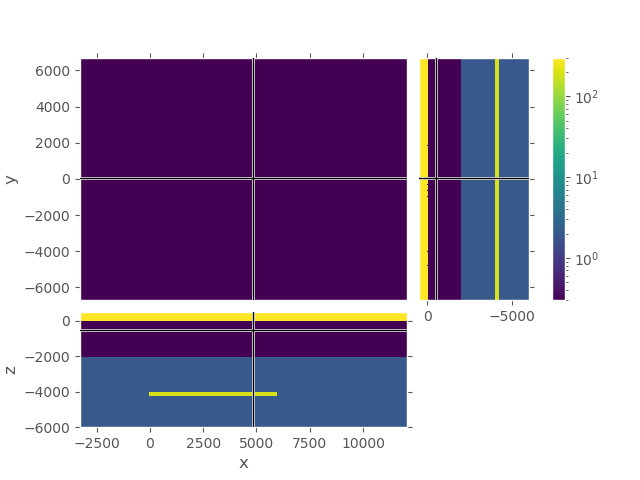

In [6]:
# Background
res_x_full =  2*np.ones(pgrid.nC)
res_y_full =  1*np.ones(pgrid.nC)
res_z_full =  3*np.ones(pgrid.nC)

# Water - isotropic
res_x_full[pgrid.gridCC[:, 2] >= -2000] = 0.3
res_y_full[pgrid.gridCC[:, 2] >= -2000] = 0.3
res_z_full[pgrid.gridCC[:, 2] >= -2000] = 0.3

# Air - isotropic
res_x_full[pgrid.gridCC[:, 2] >= 0] = 1e12
res_y_full[pgrid.gridCC[:, 2] >= 0] = 1e12
res_z_full[pgrid.gridCC[:, 2] >= 0] = 1e12


# Target
res_x_full_tg = res_x_full.copy()
res_y_full_tg = res_y_full.copy()
res_z_full_tg = res_z_full.copy()
res_x_full_tg[xx*zz] = 200
res_y_full_tg[xx*zz] = 100
res_z_full_tg[xx*zz] = 300

pmodel = emg3d.utils.Model(pgrid, res_x_full, res_y_full, res_z_full)
pmodel_tg = emg3d.utils.Model(pgrid, res_x_full_tg, res_y_full_tg, res_z_full_tg)

pgrid.plot_3d_slicer(pmodel_tg.res_x, clim=[0.3, 300], zlim=[-6000, 500], pcolorOpts={'norm': LogNorm()})

### Model background

In [7]:
sfield = emg3d.utils.get_source_field(pgrid, src, freq, 0)
pfield = emg3d.solver.solver(pgrid, pmodel, sfield, verb=3, semicoarsening=True, linerelaxation=True)


:: emg3d START :: 20:54:31 ::

   MG-cycle       : 'F'                 sslsolver : False
   semicoarsening : True [1 2 3]        tol       : 1e-06
   linerelaxation : True [4 5 6]        maxit     : 50
   nu_{i,1,c,2}   : 0, 2, 1, 2          verb      : 3
   Original grid  : 128 x  64 x 128     => 1,048,576 cells
   Coarsest grid  :   2 x   2 x   2     => 8 cells
   Coarsest level :   6 ;   5 ;   6   

   [hh:mm:ss]  rel. error                  [abs. error, last/prev]   l s

       h_
      2h_ \                                        /
      4h_  \                            /\        / 
      8h_   \                  /\      /  \      /  
     16h_    \          /\    /  \    /    \    /   
     32h_     \    /\  /  \  /    \  /      \  /    
     64h_      \/\/  \/    \/      \/        \/     

   [20:54:53]   2.504e-03  after   1 F-cycles   [6.991e-09, 0.003]   4 1
   [20:55:11]   2.389e-04  after   2 F-cycles   [6.669e-10, 0.095]   5 2
   [20:55:25]   1.317e-05  after   3 F-cycle

### Model target

In [8]:
sfield_tg = emg3d.utils.get_source_field(pgrid, src, freq, 0)
pfield_tg = emg3d.solver.solver(pgrid, pmodel_tg, sfield_tg, verb=3, semicoarsening=True, linerelaxation=True)


:: emg3d START :: 20:55:57 ::

   MG-cycle       : 'F'                 sslsolver : False
   semicoarsening : True [1 2 3]        tol       : 1e-06
   linerelaxation : True [4 5 6]        maxit     : 50
   nu_{i,1,c,2}   : 0, 2, 1, 2          verb      : 3
   Original grid  : 128 x  64 x 128     => 1,048,576 cells
   Coarsest grid  :   2 x   2 x   2     => 8 cells
   Coarsest level :   6 ;   5 ;   6   

   [hh:mm:ss]  rel. error                  [abs. error, last/prev]   l s

       h_
      2h_ \                                        /
      4h_  \                            /\        / 
      8h_   \                  /\      /  \      /  
     16h_    \          /\    /  \    /    \    /   
     32h_     \    /\  /  \  /    \  /      \  /    
     64h_      \/\/  \/    \/      \/        \/     

   [20:56:13]   2.503e-03  after   1 F-cycles   [6.986e-09, 0.003]   4 1
   [20:56:28]   2.378e-04  after   2 F-cycles   [6.637e-10, 0.095]   5 2
   [20:56:42]   2.563e-05  after   3 F-cycle

## Load `MARE2DEM` result

In [9]:
dat = np.loadtxt('./data/MARE2DEM/triaxial.0.resp', skiprows=93, usecols=6)
mare = dat[::2] + 1j*dat[1::2]

bgdat = np.loadtxt('./data/MARE2DEM/triaxial-BG.0.resp', skiprows=93, usecols=6)
bgmare = bgdat[::2] + 1j*bgdat[1::2]

x = np.arange(80)/10+2.05

# Get corresponding emg3d offsets and responses
xx = pgrid.vectorCCx[36:-12]/1e3
if not np.allclose(x, xx):
    print("\n\n\n ========= ¡ Watch out, offsets are not the same ! ========= \n\n\n")

em3_bg = pfield.fx[36:-12, 32, 50]
em3_tg = pfield_tg.fx[36:-12, 32, 50]

### Differences
- In `emg3d`, the source is a cell of 100x50x100 meters, with center at (50, 0, -1950); center is same as `MARE2DEM` source location.
- In `MARE2DEM` the receivers are at -1999.9 m depth, 10 m above the sea-surface. In `emg3d`, we take the edges with are at -2000 m, hence the seafloor itself; the edges are 100 m long (but the response is normalized).

<IPython.core.display.Javascript object>


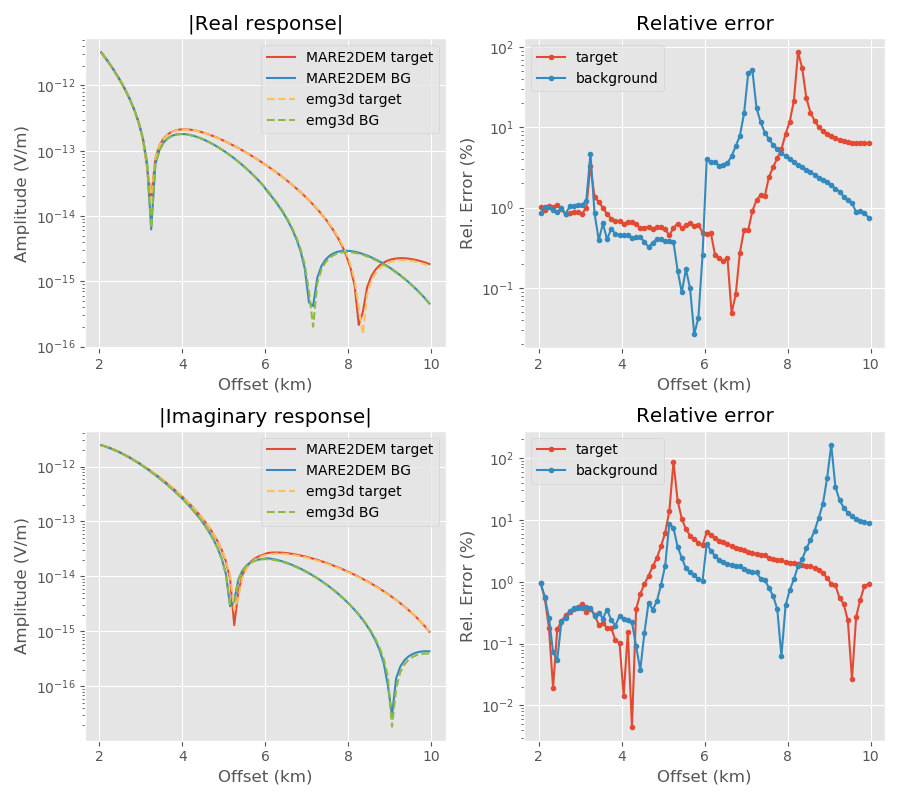

In [10]:
plt.figure(figsize=(9, 8))

plt.subplot(221)
plt.title(r'|Real response|')

plt.plot(x, np.abs(mare.real), '-', label='MARE2DEM target')
plt.plot(x, np.abs(bgmare.real), '-', label='MARE2DEM BG')

plt.plot(xx, np.abs(em3_tg.real), 'C4--', label='emg3d target')
plt.plot(xx, np.abs(em3_bg.real), 'C5--', label='emg3d BG')

#plt.yscale('symlog', linthreshy=5e-16, linscaley=0.5)
plt.yscale('log')
plt.ylabel('Amplitude (V/m)')
plt.xlabel('Offset (km)')
plt.legend()

plt.subplot(222)
plt.title(r'Relative error')

plt.semilogy(x, 100*np.abs((mare.real-em3_tg.real)/mare.real), '.-', label='target')
plt.semilogy(x, 100*np.abs((bgmare.real-em3_bg.real)/bgmare.real), '.-', label='background')


plt.ylabel('Rel. Error (%)')
plt.xlabel('Offset (km)')
plt.legend()


plt.subplot(223)
plt.title(r'|Imaginary response|')

plt.plot(x, np.abs(mare.imag), '-', label='MARE2DEM target')
plt.plot(x, np.abs(bgmare.imag), '-', label='MARE2DEM BG')

plt.plot(xx, np.abs(em3_tg.imag), 'C4--', label='emg3d target')
plt.plot(xx, np.abs(em3_bg.imag), 'C5--', label='emg3d BG')

#plt.yscale('symlog', linthreshy=5e-16, linscaley=0.5)
plt.yscale('log')
plt.ylabel('Amplitude (V/m)')
plt.xlabel('Offset (km)')
plt.legend()

plt.subplot(224)
plt.title(r'Relative error')

plt.semilogy(x, 100*np.abs((mare.imag-em3_tg.imag)/mare.imag), '.-', label='target')
plt.semilogy(x, 100*np.abs((bgmare.imag-em3_bg.imag)/bgmare.imag), '.-', label='background')


plt.ylabel('Rel. Error (%)')
plt.xlabel('Offset (km)')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
emg3d.Report()

--------------------------------------------------------------------------------
  Date: Thu Nov 07 20:57:44 2019 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            1.17.3 : numpy
             1.3.1 : scipy
            0.46.0 : numba
             0.9.0 : emg3d
             7.9.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------